In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


In [2]:
data=pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.shape

(205, 26)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
data.isna().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
data.duplicated().sum()


0

In [7]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
fig = px.bar(data, x='fueltype', y="price", barmode="group")
fig.show()

In [9]:
fig = px.bar(data, x='doornumber', y="price", barmode="group")
fig.show()

In [10]:
fig = px.bar(data, x='drivewheel', y="price", barmode="group")
fig.show()

In [11]:
fig = px.bar(data, x='cylindernumber', y="price", barmode="group")
fig.show()

In [12]:
fig = px.bar(data, x='aspiration', y="price", barmode="group")
fig.show()

In [13]:
fig = px.bar(data, x='enginelocation', y="price", barmode="group")
fig.show()

In [14]:
fig = px.bar(data, x='carbody', y="price", barmode="group")
fig.show()

In [15]:
fig = px.bar(data, x='fuelsystem', y="price", barmode="group")
fig.show()

In [16]:
fig = px.bar(data, x='enginetype', y="price", barmode="group")
fig.show()

In [17]:
fig = px.scatter(data, x='horsepower', y="price")
fig.show()

In [18]:
fig = px.scatter(data, x='peakrpm', y="price")
fig.show()


In [19]:
fig = px.scatter(data, x='wheelbase', y="price")
fig.show()

In [20]:
mapp={'gas':0,'diesel':1}
data['fueltype']=data['fueltype'].map(mapp)

In [21]:
mapp1={'two':2,'four':4}
data['doornumber']=data['doornumber'].map(mapp1)

In [22]:
mapp2={'front':0,'rear':1}
data['enginelocation']=data['enginelocation'].map(mapp2)

In [23]:
mapp3={'convertible':0,'hatchback':1,'sedan':2,'wagon':3,'hardtop':4}
data['carbody']=data['carbody'].map(mapp3)

In [24]:
mapp4={'dohc':0,'ohcv':1,'ohc':2,'l':3,'rotor':4,'ohcf':5,'dohcv':6}
data['enginetype']=data['enginetype'].map(mapp4)

In [25]:
mapp5={'mpfi':0,'2bbl':1,'mfi':2,'1bbl':3,'spfi':4,'4bbl':5,'idi':6,'spdi':7}
data['fuelsystem']=data['fuelsystem'].map(mapp5)

In [26]:
mapp6={'std':0,'turbo':1}
data['aspiration']=data['aspiration'].map(mapp6)

In [27]:
mapp7={'rwd':0,'fwd':1,'4wd':2}
data['drivewheel']=data['drivewheel'].map(mapp7)

In [28]:
mapp8={'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12}
data['cylindernumber']=data['cylindernumber'].map(mapp8)

In [29]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,2,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,2,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,0,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,4,2,1,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,4,2,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [30]:
outlier_percentage = {}
for feature in ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']:
    tempData = data.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)
    outlier_percentage[feature] = round((((tempData<(Q1 - 1.5 * IQR)) | (tempData>(Q3 + 1.5 * IQR))).sum()/tempData.shape[0])*100,2)
outlier_percentage


{'wheelbase': 1.46,
 'carlength': 0.49,
 'carwidth': 3.9,
 'carheight': 0.0,
 'curbweight': 0.0,
 'enginesize': 4.88,
 'boreratio': 0.0,
 'stroke': 9.76,
 'compressionratio': 13.66,
 'horsepower': 2.93,
 'peakrpm': 0.98,
 'citympg': 0.98,
 'highwaympg': 1.46}

In [31]:
outlier = data[(data[feature]>Lower_range) & (data[feature]<Upper_range)].reset_index(drop=True)


In [32]:
data.drop(['car_ID','CarName'],axis=1,inplace=True)

<AxesSubplot:>

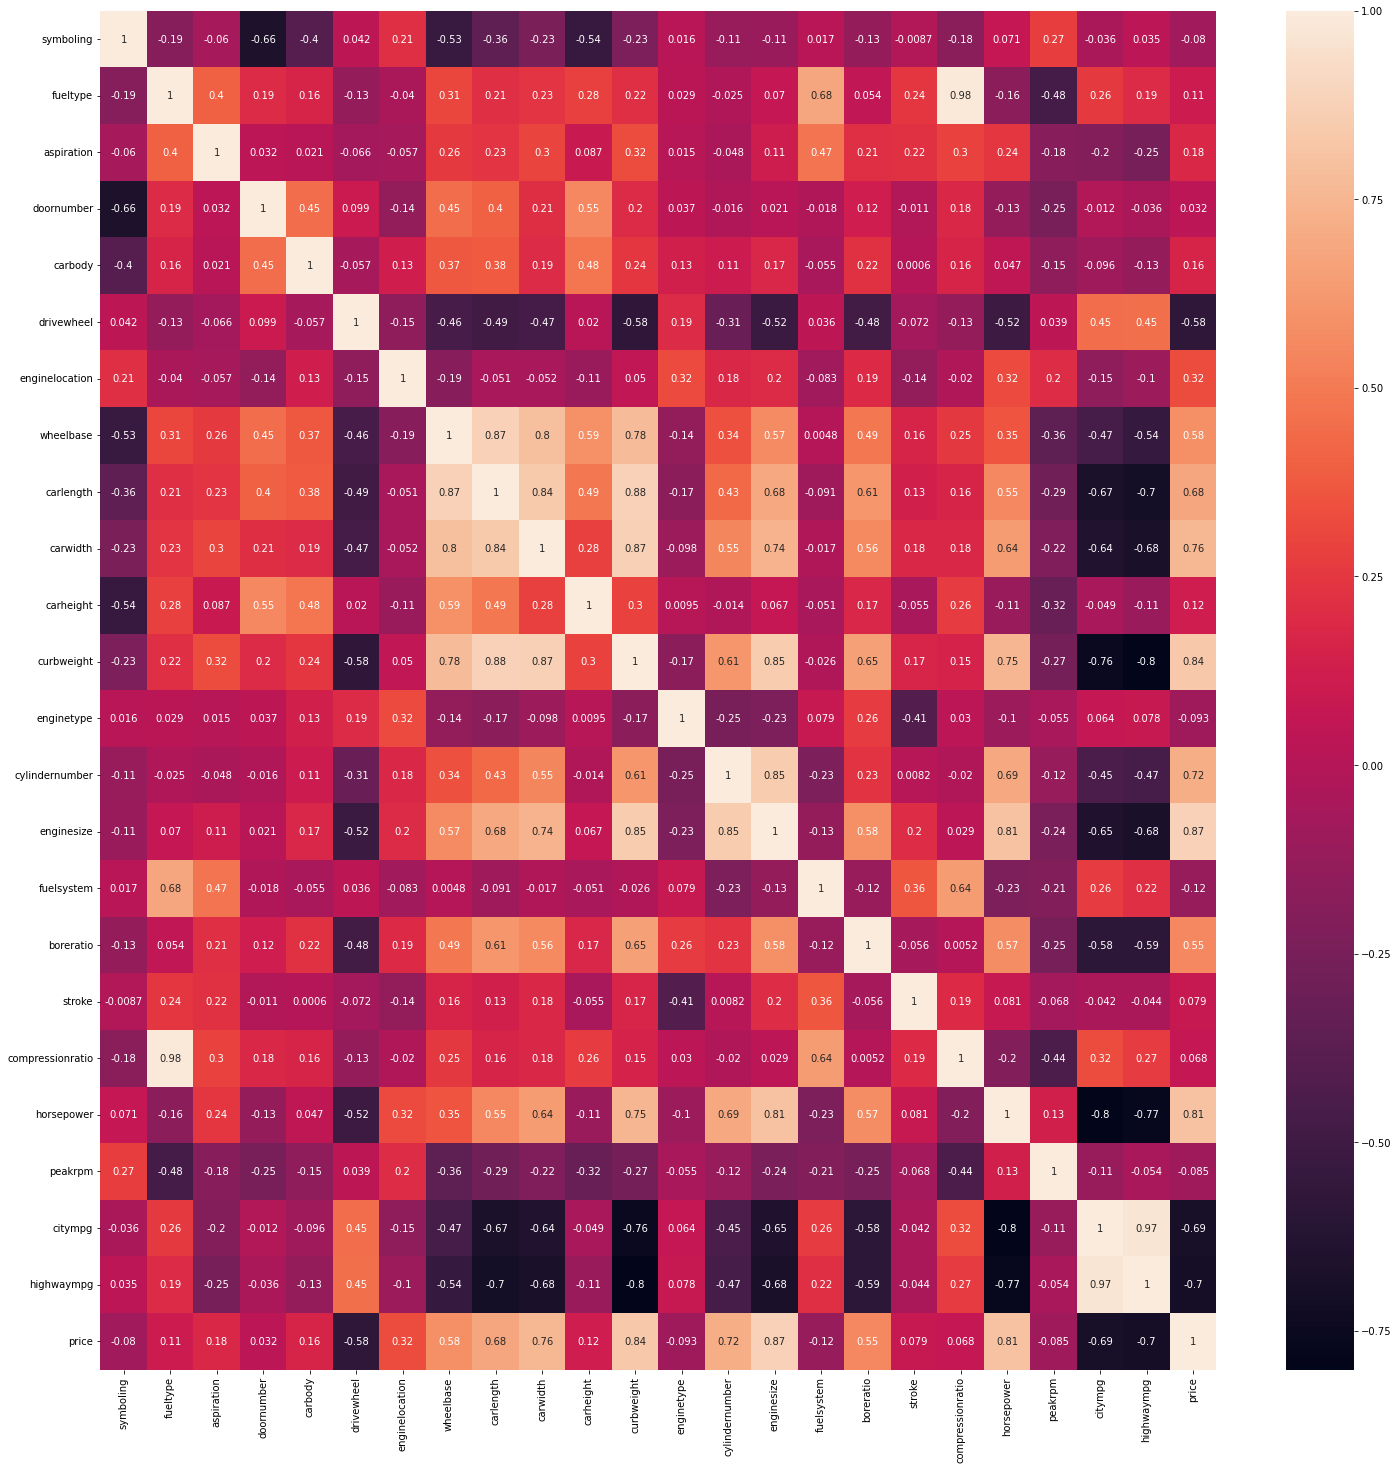

In [33]:
plt.figure(figsize=(25,25))
corr=data.corr()
sns.heatmap(corr,annot=True)

In [34]:
X=data.drop('price',axis=1)
y=data['price']

In [35]:
from sklearn.feature_selection import SelectKBest,f_regression
best=SelectKBest(score_func=f_regression,k='all')
fit=best.fit(X,y)
dfScores=pd.DataFrame(fit.scores_)
dfCol=pd.DataFrame(X.columns)
featScore=pd.concat([dfCol,dfScores],axis=1)
featScore.columns=['Feature','Score']
featScore=featScore.sort_values(by='Score',ascending=False).reset_index(drop=True)
print(featScore.nlargest(15,'Score'))

           Feature       Score
0       enginesize  657.640421
1       curbweight  468.594431
2       horsepower  382.163409
3         carwidth  276.423646
4   cylindernumber  216.388502
5       highwaympg  192.437464
6          citympg  180.203163
7        carlength  177.420344
8       drivewheel  101.838772
9        wheelbase  101.745716
10       boreratio   89.507470
11  enginelocation   23.969740
12      aspiration    6.636622
13         carbody    5.422253
14      fuelsystem    3.073152


In [36]:
data.drop(['symboling','fueltype','doornumber','carheight',
           'stroke','enginetype','compressionratio'],axis=1,inplace=True)


In [37]:
from sklearn.model_selection import train_test_split ,cross_val_score,RandomizedSearchCV
X_train ,X_test,y_train ,y_test =train_test_split(X,y,test_size =.2 , random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [39]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression ,SGDRegressor,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor
from xgboost.sklearn import XGBRegressor

In [40]:
models = {'Linear Regression': LinearRegression(),
         'Lasso': Lasso(),
         'Decision Tree': DecisionTreeRegressor(),
         'Random Forest': RandomForestRegressor(),
         'Gradient Boosting':GradientBoostingRegressor(),
         'Ridge': Ridge(),
         'Stochastic Gradien Descent': SGDRegressor(),
         'Elastic': ElasticNet(),
         'xgb Regressor': XGBRegressor()}

In [41]:
def fit_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = cross_val_score(model,
                                             X_test,
                                             y_test,
                                            scoring='neg_mean_squared_error',
                                            cv=3
                                            ).mean()

    return model_scores

In [42]:
model_scores = fit_score(models,X_train,X_test,y_train,y_test)

model_scores

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.395e+06, tolerance: 2.494e+05

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.127e+06, tolerance: 1.385e+05

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.944e+07, tolerance: 2.593e+05

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradien

{'Linear Regression': -109715105.82268924,
 'Lasso': -56977099.31944633,
 'Decision Tree': -24349892.712033987,
 'Random Forest': -15643151.021641225,
 'Gradient Boosting': -19704303.788896676,
 'Ridge': -29381090.86463404,
 'Stochastic Gradien Descent': -32960917.335740715,
 'Elastic': -19476989.243831452,
 'xgb Regressor': -21539454.45932226}

In [43]:
np.random.seed(42)
params={
        'criterion':['mse', 'mae'],
         'max_features':['auto','sqrt','log2'],
        'max_depth':[2,3,10]
       }
rs = RandomizedSearchCV(RandomForestRegressor(),
                                param_distributions=params,
                                cv=3,
                                n_iter=30,
                                verbose=0,
                                n_jobs=-1
                               )

rs.fit(X_train, y_train)

rs.best_params_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:296: UserWarning:

The total space of parameters 18 is smaller than n_iter=30. Running 18 iterations. For exhaustive searches, use GridSearchCV.

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:392: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



{'max_features': 'auto', 'max_depth': 10, 'criterion': 'mse'}

In [44]:
rs.best_estimator_


RandomForestRegressor(criterion='mse', max_depth=10)

In [45]:
rs.best_score_

0.878122084576947

In [46]:
rs.score(X_test, y_test)


0.879062572025784

In [47]:
model = RandomForestRegressor(max_depth= 10, criterion='absolute_error')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [48]:
r2_score(y_test,y_pred)


0.8794368144528448

In [49]:
vot=VotingRegressor([('LinearRegression',LinearRegression()),('DecisionTrees',DecisionTreeRegressor()),('LassoRegression',Lasso()),
                     ('RandomForest',RandomForestRegressor()),('ElasticNet',ElasticNet()),
                     ('StochasticGradientDescent',SGDRegressor()),
                    ('GrafientBoosting',GradientBoostingRegressor()),('Ridge',Ridge()),('xgb',XGBRegressor())])
vot.fit(X_train,y_train)
y_pred1=vot.predict(X_test)

In [50]:
-mean_squared_error(y_test,y_pred1)


-9739157.84954065

In [51]:
rs.score(X_test, y_pred1)


0.9350285825465187